    Instructor(s): Dr. Kenneth Duru
    First Semester 2019
    Mathematical Sciences Institute
    Australian National University
    
# Math3511, Scientific Computing

This Lab book must be submitted by **8th April 5pm**. Late Submissions will incur a 5% penalty
per working day. Assignment submissions will close on the **15th April 5pm**. Submissions after
this time will be invalid.

# Lab 2: Equations

In [58]:
%matplotlib inline

## A. Inner Products and the Gram-Schmidt Algorithm

Given a vector space $V$ over the field $R$, an *Inner Product* on $V$ is a (bilinear) function

$$
\langle \cdot ,\cdot \rangle : V\times V \rightarrow \mathbb{R}
$$

with the following properties;

1. Symmetry - $\langle x,y \rangle = \langle y,x \rangle$.
2. Positive definiteness - $\langle x,x \rangle \geq 0$ & $\langle x,x\rangle =0 \Leftrightarrow x=0$.
3. (Bi)Linearity - $\langle a x +y, z \rangle = a\langle x,z\rangle +\langle y,z\rangle$ for any scalar $a$.

As we've seen with the Conjugate Gradient Method, given a square symmetric positive definite matrix $A$, an *inner product* on $\mathbb{R}^{n}$ is given by 

$$
\langle x,y \rangle_{A}  = x^{T}Ay.
$$

<span style="color:blue;">
1) Write a Python function called `dotA` which takes three arguments (a square symmetric positive definite matrix $A$, and two vectors $x$ and $y$), and computes the matrix inner product $\langle x,y \rangle_{A}$. Test your code with examples and show that it works. (10 points)
</span>

<div style="color:limegreen;">
**Answer**:  
</div>

In [59]:
import numpy as np
def dotA(x,y,A):
    z1=np.dot(A,y)
    z2=np.dot(np.transpose(x),z1)
    return z2

#examples
x = np.array([1,2])
y = np.array([3,5])
A = np.array([[2,3],[5,2]])

z = dotA(x,y,A)
z

71

<span style="color:blue;">
2) Remember that in $\mathbb{R}^{n}$ the Gram Schmidt Algorithm orthonormalizes a set of (up to) $n$ vectors with respect to an inner product.  
Write a Python function to implement the Gram Schmidt Algorithm in $\mathbb{R}^{n}$ with the inner product given by `dotA`, where $A$ is an $n\times n$ matrix given by
</span>

<span style="color:blue;">
$$
A=
\begin{bmatrix}
5&1&0&\dotso&0\\
1&5&1&\dotso&0\\
\vdots&\ddots&\ddots&\ddots&\vdots\\
0&\dotso&1&5&1\\
0&\dotso&0&1&5
\end{bmatrix}.
$$
</span>

<span style="color:blue;">
Test your code with examples to show that it works.  (10 points)
</span>

<div style="color:limegreen;">
**Answer**:  
</div>

Note: The vector above are row vector.
we use $$
A=
\begin{bmatrix}
3&5&6&8\\
7&4&5&7\\
14&6&5&9\\
6&9&12&5
\end{bmatrix}.
$$
</span>
as the input vector and get the ouput as orthonormal sets.

In [62]:
from scipy.sparse import spdiags
n=4

#initialise a list of vectors 4 *(1,4)
v_list = np.array([[3.,5.,6.,8.],
                   [7.,4.,5.,8.],
                   [14.,6.,5.,9.],
                   [6.,9.,12.,5.]])
                   
# define the matrix A 
data = np.array([5*np.ones(n), np.ones(n), np.ones(n)])
diags = np.array([0, -1, 1])
A=spdiags(data, diags, n, n).toarray()

def projA(x,y,A):
    #return projection of y vector in x's direction
    p = dotA(x,y,A)/dotA(x,x,A)*x
    return p


def GS(v_list,A):
    #input: list of vextors
    #output: list of orthonormal vectors
    #projection vector
    n=4
    u_list=[]
    for i in range(n):
        vi=v_list[i]
        ui=vi
        for j in range(i-1):
            ui = ui - projA(u_list[j],vi,A)
        ui = ui/np.sqrt(dotA(ui,ui,A))
        u_list.append(ui)
    return u_list

u_list = GS(v_list,A)
u_list

[array([0.10253789, 0.17089648, 0.20507578, 0.27343437]),
 array([0.22758963, 0.13005122, 0.16256402, 0.26010244]),
 array([ 0.42645358, -0.02116236, -0.11829215, -0.05919541]),
 array([-0.16631965, -0.06925771, -0.06032077, -0.38513788])]

## B. Solving nonlinear equations, python modules, arrays, lists, functions, scipy, timing and plotting


In this example we investigate the time it takes to reach a certain
accuracy using the Newton method and the secant method. Three test cases
are considered: first, confirm that your own code is second order
accurate using the number of Newton iterations as a parameter. Then
study scipy's Newton and secant method using the tolerance tol as
parameter. Consider the determination of the zero of
$f(x) = \exp(-x) - x$.

First some preparations:

-   We will use the modules math, time, scipy, scipy.optimize and scilab
    which need to be imported
-   Then we will require an implementation of the function $f(x)$ and of
    its derivative $f^\prime(x)$
-   As we are interested in the performance of our method in the case
    where the function evaluation is very costly we will artificially
    increase the time for evaluation of $f(x)$ and its derivative by a
    substantial amount using the sleep function from the time module
-   As we do not know the exact solution, we will use the scipy library
    Newton method to determine a very accurate approximation as
    reference solution
-   We will use the time function from the time module to determine the
    time required for the solvers. You might have to do multiple runs of
    the timing to get an accurate time.
-   Carefully study all codes and parts of this lab marked labbook and fill-in the missing bits, in particular anything marked LB
-   Correcting the code is an essential part of this lab ...

<span style="color:blue;">
3) Fill in the code below and comment on the output. (3 points)
</span>

In [96]:
# you will need the modules: math, time, scipy, scipy.optimze 
import math as ma
from scipy import optimize as so
import time as tm
#LB   ... fill in the missing bits here ...
        
# define function and derivative
        
tev = 0.01 # time for one function evaluation (see sleep below)
        
def f(x):
    """ function evaluation """
    fx = np.exp(-x)-x
    tm.sleep(tev) # add some time to mimic a lengthy function evaluation
    return fx
        
def df(x):
    """ derivative evaluation """
    dfx = -np.exp(-x)-1
    tm.sleep(tev)
    return dfx
    #LB fill in the derivative
        
# reference solution (so is module scipy.optimize)
xref = so.newton(f,0.0,df,tol=1e-20)
        
# testing the timing
        
# timing one function evaluation  -- should be approximately tev seconds
t0 = tm.time()
y = f(37)
t1 = tm.time()
print('function evaluation elapsed time: ', t1-t0)
        
# timing one Newton step -- should be approximately 2tev seconds
x0 = 0.3
t0 = tm.time()
x1 = x0 - f(x0)/df(x0)
t1 = tm.time()
print("Newton step evaluation elapsed time: ", t1-t0)
    
#LB: run this part and hand in the results produced by print ..

function evaluation elapsed time:  0.01997995376586914
Newton step evaluation elapsed time:  0.03000617027282715


comment: The Newton step evaluation time is longer than the function evaluation time because it takes more steps.

<div style="color:blue;">
4) Now use `timeit` to test and see the function evaluation timing. (2 points)
</div>

<div style="color:limegreen;">
**Answer**:  
</div>

In [7]:
%%timeit
y = f(37)

15.9 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%%timeit
x1 = x0 - f(x0)/df(x0)
#LB: Insert the newton step below to work out x1 from x0

33.6 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### B1. First experiment: implement very simple Newton method and compare accuracy against time spent.

<span style="color:blue;">
5) In a first experiment you should implement a very simple Newton solver
which takes as input the number of Newton steps but does not use any
termination conditions. Consider the cases of one to ten Newton steps.
Plot the time for each case and also the relative error agains the
reference solution. (Hint use semilogy to plot the relative error and
add $10^{-20}$ to all relative errors to avoid having to deal with zero
errors.) How many iterations does it take to reach the exact solution?
Can you confirm the convergence order by visual inspection? (25 points)
</span>

<div style="color:limegreen;">
**Answer**:  
</div>

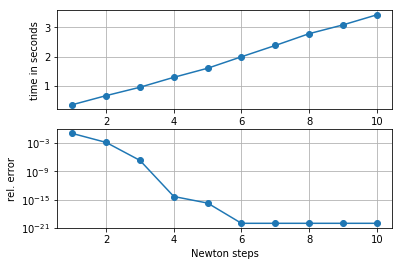

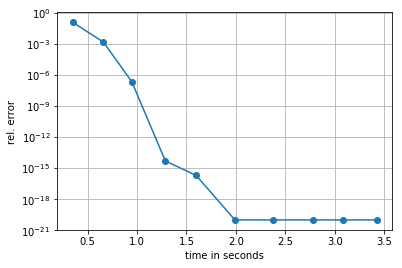

In [90]:
# First experiment -- solution
import timeit as ti
import scipy as sp
import matplotlib.pyplot as plt
xref = so.newton(f,0.0,df,tol=1e-20)
# my Newton routine
def myNewton(f,df,x0,nsteps=5):
    #LB  here comes your simple Newton solver
    xs=x0
    for n in range(nsteps):
        xs = xs - f(xs)/df(xs)
        n+=1
    return xs
    # f: function, df: derivative, x0: starting value, nmax: number of Newton steps

# timing myNewton over a tolerance range
tivec = []  # initialise a time list
revec = []  #        "

# Think about adding a list here, which you can use to plot the theoretical
# convergence rate

nsimvec = range(10) # range of number of Newton iterations
x0 = 0.0
for n in nsimvec:
    xs = myNewton(f,df,x0,nsteps=n+1)
    tivec.append(ti.timeit('xs=myNewton(f,df,x0,nsteps=n+1)',
                           setup='from __main__ import myNewton,f,df,x0,n',number=10))
    # added the time to the list tivec
    revec.append(abs((xs-xref)/xref))  # add the rel. error to the list revec
    # How would you update your convergence rate list?
revec = sp.array(revec) + 1e-20  # convert list into an array and add a very small number
                                     # (trick to make 0 display on log plots)
        
#LB study the following carefully and modify if necessary

plt.figure(1)  # generate a first figure (pl refers to module pylab)
plt.subplot(211)       
plt.plot(np.array(nsimvec)+1, tivec,'o-')  # plot time against number of Newton iterations
plt.grid(True)         # display a grid for readability
plt.ylabel('time in seconds')  # label the y axis
plt.subplot(212)       
plt.semilogy(np.array(nsimvec)+1, revec,'o-')  # plot error against number of Newton iterations
plt.grid(True)
plt.ylabel('rel. error')
plt.xlabel('Newton steps')   # on the lower plot we also provide the label for the x-axis
plt.show() # display the plot

plt.figure(2)   # second figure
plt.semilogy(tivec, revec, 'o-')  # like above the y axis is logarithmic
plt.xlabel('time in seconds')
plt.ylabel('rel. error')
plt.grid(True)
plt.show()

#LB: important - play around, add extra features and  modify plots to look better 
# actually, you only need to modify when something doesn't work

It take 6 iterations to reach the exact solution.

By visual inspection $|e^{(k+1)}| = C |e^{(k)}|^2$ before reaching the exact solution. So it is second order accurate using the number of Newton iterations as a parameter.

### B2. Second experiment: investigate the tolerance parameter of the scipy newton method

<span style="color:blue;">
6) The Newton method of scipy does have a tolerance parameter (tol) which
lets you control the accuracy of the solution. Here we suggest that you
study the accuracy and time spent as a function of this tolerance
parameter and again confirm the second order accuracy by visual
inspection. Measure time and accuracy for values of tol equal to
$10^{-k}$ for $k=0,\ldots,20$ and plot time and accuracy against the
tolerance parameter. Comment on how well the tol parameter estimates the
accuracy. Use a semilogx plot for the tolerance vs time and loglog plot
for the tolerance against accuracy. Finally plot (semilogy) time taken
against accuracy measured. How many iterations does the method take,
compare against your own method.  (25 points)
</span>

<div style="color:limegreen;">
**Answer**:  
</div>

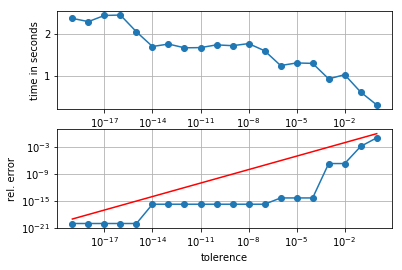

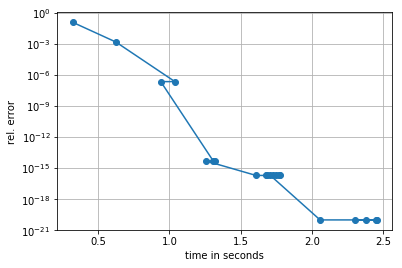

In [94]:
# Second experiment -- solution
import scipy as sp
# timing scipy Newton over a tolerance range
#LB fill in the missing bits (as in the previous example)
#LB generate a list where you store the values of the tol parameter

tivec = []  # initialise a list
revec = []  #        "

tol = 1.0
tolvec = []  # to hold list of tolerances (you could also create this list in advance ...)
nsim = 20
for n in range(nsim):
    xs = so.newton(f,x0,fprime=df,tol=tol)
    tivec.append(ti.timeit('xs = optimize.newton(f,x0,fprime=df,tol=tol)',
                           setup='from scipy import optimize;from __main__ import f,df,x0,tol',
                           number=10))
    # added the time to the list tivec
    revec.append(abs((xs-xref)/xref))  # add the rel. error to the list revec
    # How would you update your convergence rate list?

                              
    #LB same as before but now for the scipy Newton method
    # don't forget to import the scipy.optimize module in timeit!
    #LB don't forget to update tolvec
    tolvec.append(tol)
    tol = tol/10.0
    
revec = sp.array(revec) + 1e-20  # convert list into an array and add a very small number
        
        
plt.figure(1)  # generate a first figure (pl refers to module pylab)
plt.subplot(211)       
plt.semilogx(tolvec, tivec,'o-')  # plot time against tolerence
plt.grid(True)         # display a grid for readability
plt.ylabel('time in seconds')  # label the y axis
plt.subplot(212)       
plt.loglog(tolvec, revec,'o-')  # plot error against tolerence
plt.loglog(tolvec, tolvec,'r')  # plot error against tolerence
plt.grid(True)
plt.ylabel('rel. error')
plt.xlabel('tolerence')   # on the lower plot we also provide the label for the x-axis
plt.show() # display the plot

plt.figure(2)   # second figure
plt.semilogy(tivec, revec, 'o-')  # like above the y axis is logarithmic
plt.xlabel('time in seconds')
plt.ylabel('rel. error')
plt.grid(True)
plt.show()
#LB plotting as before -- use log plot for tolerance and errors and ordinary plot for time
#LB include a line with loglog(tolvec, tolvec, 'r') to get an idea how errors and tolerance
#   fit together

How well the tol parameter estimates the accuracy:  We can see that relative error is a monotonous function of tolerence. But it jumps at some value of tol, otherwise it is not sensitive to the value of tol .It is basiclly a good measurement of accuracy. 

Comparing with my own method: The time it needs to reach exact solution is about 2s.
Thus it will take 6 iterations. It is the same with our own method.

### B3. Third experiment: investigating the tolerance parameter for the scipy secant method

<span style="color:blue;">
7) It is possible to use scipy.optimize.newton as a secant method by
omitting the derivative as an input. Investigate the performance for
this case. (25 points)
</span>

<div style="color:limegreen;">
**Answer**:  
</div>

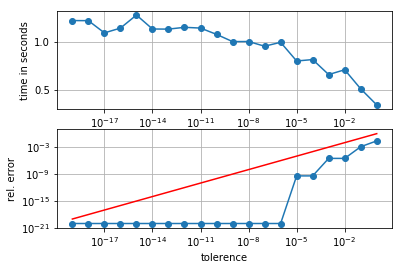

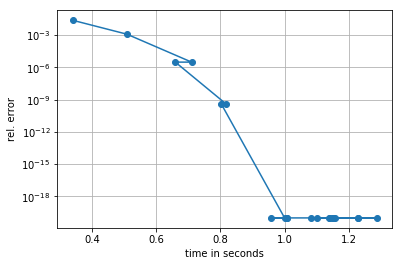

In [70]:
# Third experiment -- labbook
tivec = []  # initialise a list
revec = []  #        "

tol = 1.0
tolvec = []  # to hold list of tolerances (you could also create this list in advance ...)
nsim = 20
for n in range(nsim):
    xs = so.newton(f,x0,tol=tol)
    tivec.append(ti.timeit('xs = optimize.newton(f,x0,tol=tol)',
                           setup='from scipy import optimize;from __main__ import f,x0,tol',
                           number=10))
    # added the time to the list tivec
    revec.append(abs((xs-xref)/xref))  # add the rel. error to the list revec
    # How would you update your convergence rate list?

                              
    #LB same as before but now for the scipy Newton method
    # don't forget to import the scipy.optimize module in timeit!
    #LB don't forget to update tolvec
    tolvec.append(tol)
    tol = tol/10.0
    
revec = sp.array(revec) + 1e-20  # convert list into an array and add a very small number
        
        
plt.figure(1)  # generate a first figure (pl refers to module pylab)
plt.subplot(211)       
plt.semilogx(tolvec, tivec,'o-')  # plot time against tolerence
plt.grid(True)         # display a grid for readability
plt.ylabel('time in seconds')  # label the y axis
plt.subplot(212)       
plt.loglog(tolvec, revec,'o-')  # plot error against tolerence
plt.loglog(tolvec, tolvec,'r')  # plot error against tolerence
plt.grid(True)
plt.ylabel('rel. error')
plt.xlabel('tolerence')   # on the lower plot we also provide the label for the x-axis
plt.show() # display the plot

plt.figure(2)   # second figure
plt.semilogy(tivec, revec, 'o-')  # like above the y axis is logarithmic
plt.xlabel('time in seconds')
plt.ylabel('rel. error')
plt.grid(True)
plt.show()
#LB do the same for the secant method (Hint: check the documentation of scipy.optimize.newton)

The performance of this method is better than previous method:
Relative error is more sensitive to tol. The tol parameter estimates the accuracy better. Also, the time required by this method is much lower.The time it needs to reach exact solution is about 1s, nearly half of the time by previous method.